In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.fashion_mnist

### Load fashion mnist data

In [3]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

4423680/4422102 [==============================] - 1s 0us/step


**Finally we will define a list of the class names and pre-process images. We do this by dividing each image by 255. Since each image is greyscale we are simply scaling the pixel values down to make computations easier for our model.**

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0

In [6]:
train_images.shape

(60000, 28, 28)

### Creating the model

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

### Training the model

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.4974 - accuracy: 0.8269
Epoch 2/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3743 - accuracy: 0.8647
Epoch 3/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3369 - accuracy: 0.8766
Epoch 4/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3126 - accuracy: 0.8856
Epoch 5/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2938 - accuracy: 0.8922


### Testing the model

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8745


### Using the model

In [10]:
predictions = model.predict(test_images)

**Now we will display first five images and their prediction**

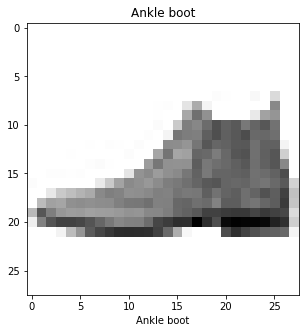

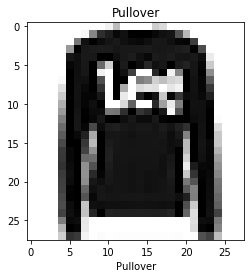

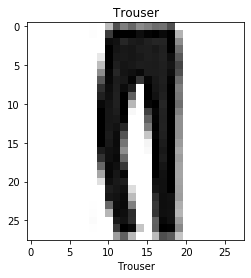

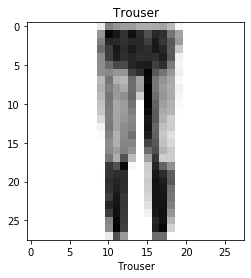

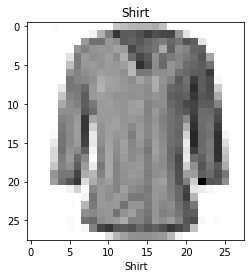

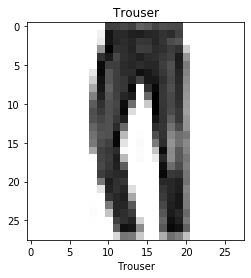

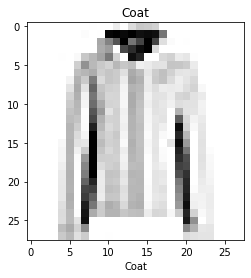

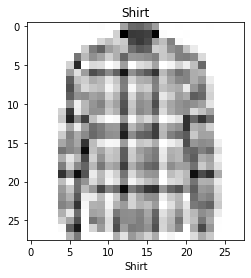

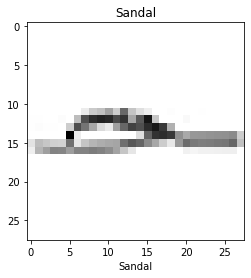

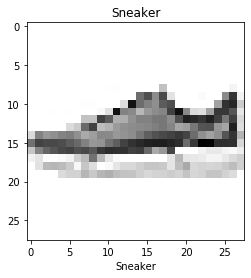

In [12]:
plt.figure(figsize=(5,5))
for i in range(10):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
    plt.title(class_names[np.argmax(predictions[i])])
    plt.show()